In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from msc_project.utils.fit_NLS import *

plt.style.use('ggplot')

In [16]:
# DATA_PATH = '/scratch/msc24h18/nls_fit/data/Data_for_NLS/10000 nm ID2946.csv'
# PMAX_PATH = '/scratch/msc24h18/nls_fit/data/Data_for_NLS/maxpols/10000 nm ID2946.csv'

# data = load_data(DATA_PATH)
# pmax = np.loadtxt(PMAX_PATH, delimiter=',', skiprows=1)
# pmax = {float(v): min(p*1.05, 1) for v, p in pmax}

# fig, axs = plt.subplots(1, 2, figsize=(20, 10))
# fig.suptitle(DATA_PATH)
# opt_df, popt_tl = plot_all_iterative(data, axs, pmax=pmax, p0_tmin=None, p0_tmax=None, fit_type="lorentzian")
# axs[0].set(xlabel = 'Pulse duration', ylabel = 'Partial polarization', xscale='log', ylim=(0, 1))
# axs[0].legend()
# axs[1].clear()

# voltages = opt_df['voltage'].values
# log_taus = opt_df['p2'].values

# axs[1].scatter(opt_df['voltage'], opt_df['p2'])
# popt, pcov = curve_fit(lambda V, t0, V0, n: np.log(f_tau(V, t0, V0, n)), voltages, log_taus)
# v = np.linspace(voltages.min(), voltages.max(), 1000)
# t = f_tau(v, *popt)
# axs[1].plot(v, np.log(t), label=f'$\\log(\\tau_{{Lorentz}})$ (fit): $\\tau_0$={popt[0]:.2e}, $V_0$={popt[1]:.2f}, $n$={popt[2]:.2f}')

# axs[1].legend()
# plt.tight_layout()
# plt.show()

In [ ]:
# TODO: Multithreading

DATA_PATH = '/Users/pauluv/Documents/Code/msc_project/data/Data_for_NLS'

csv_files = [f for f in os.listdir(DATA_PATH) if f.endswith('.csv')]
fit_data = {"size": [], "voltage": [], "n": [], "A": [], "omega": [], "log_tlorentz": []}

n_vals = [1.5, 1.75, 2, 2.25, 2.5]
n_tol = 0.01
for f in csv_files:
    size = f.split(' ')[0]
    data = load_data(os.path.join(DATA_PATH, f))

    for n in n_vals:
        p0 = [0.2, 0.1, -7, n]
        bounds = ([-np.inf, -np.inf, -np.inf, n-n_tol], [np.inf, np.inf, np.inf, n+n_tol])
        for col in data.columns[1:]:
            try:
                popt = fit_polarization(data['Pulse Width'], data[col], type="lorentzian", p0=p0, bounds=bounds)
            except Exception as e:
                print(f"Couldn't fit {col}V (size {size}): {e}")
                continue

            fit_data["size"].append(size)
            fit_data["voltage"].append(col)
            fit_data["A"].append(popt[0])
            fit_data["omega"].append(popt[1])
            fit_data["log_tlorentz"].append(popt[2])
            fit_data["n"].append(popt[3])

            print(f"Fit {col}V (size {size}): {popt}")

fit_df = pd.DataFrame(fit_data)

Fit 1.00V (size 600): [ 6.40879541e-02  4.73487995e-05 -5.11257903e+00  1.50999114e+00]
Fit 1.25V (size 600): [  0.05924425   0.74294701 -22.63125943   1.49427118]
Fit 1.50V (size 600): [ 0.05054684  0.66643119 -5.35686699  1.50998514]
Fit 1.75V (size 600): [ 0.74614408  0.2727967  -4.38522398  1.51      ]
Fit 2.00V (size 600): [ 0.99135846  0.79205749 -4.36139942  1.51      ]
Fit 2.25V (size 600): [ 0.52717103  0.67582391 -6.56289835  1.51      ]
Fit 2.50V (size 600): [ 0.44827926  0.31015184 -7.4145545   1.49      ]
Fit 2.75V (size 600): [ 0.48524413  0.37785774 -8.02446454  1.49      ]
Fit 3.00V (size 600): [ 0.44933048  0.18550707 -8.62481862  1.51      ]
Fit 3.25V (size 600): [ 0.40894997  0.23571643 -9.04373315  1.51      ]
Couldn't fit 3.50V (size 600): Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit 3.75V (size 600): [  0.61721217   7.65351076 -12.1045803    1.50981555]


/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: overflow encountered in scalar power
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)
/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)


Couldn't fit 4.00V (size 600): (34, 'Result too large')
Fit 4.25V (size 600): [  0.49376098   3.09459869 -30.97134182   1.49060112]


/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: overflow encountered in scalar divide
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)


Couldn't fit 4.50V (size 600): (34, 'Result too large')
Couldn't fit 4.75V (size 600): (34, 'Result too large')
Fit 5.00V (size 600): [  0.4759038    0.82334579 -11.1651458    1.49      ]
Couldn't fit 1.00V (size 600): Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit 1.25V (size 600): [  0.05924425   0.45209721 -21.3605654    1.7455397 ]
Fit 1.50V (size 600): [ 0.05089743  0.67761003 -5.36575841  1.76      ]
Fit 1.75V (size 600): [ 0.62938081  0.29102628 -4.50966392  1.75999993]
Fit 2.00V (size 600): [ 0.96215592  0.80457272 -4.42318824  1.76      ]
Fit 2.25V (size 600): [ 0.529414    0.6988383  -6.57607074  1.76      ]
Fit 2.50V (size 600): [ 0.45134403  0.34676334 -7.42735874  1.74      ]
Fit 2.75V (size 600): [ 0.48780458  0.40884562 -8.0366229   1.74      ]
Fit 3.00V (size 600): [ 0.45011774  0.20758548 -8.63854907  1.76      ]
Fit 3.25V (size 600): [ 0.40899431  0.23694224 -9.03885148  1.75630421]
Couldn't fit 3.50V (size 600): Optimal para

/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: overflow encountered in scalar power
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)


Fit 1.25V (size 30000): [ 0.01173969  0.44643534 -4.8891731   2.50999705]
Fit 1.50V (size 30000): [ 1.00734587e+00 -2.86172156e-04 -4.08342058e+00  2.51000000e+00]
Fit 1.75V (size 30000): [ 0.19502212  0.25543792 -5.09724705  2.51      ]
Fit 2.00V (size 30000): [ 0.34889302  0.12610429 -5.52871184  2.49      ]
Fit 2.25V (size 30000): [ 0.46068008 -0.13190433 -5.83839188  2.49      ]
Fit 2.50V (size 30000): [ 0.5112226   0.16673681 -6.04119173  2.49      ]
Fit 2.75V (size 30000): [ 0.51627846 -0.12724634 -6.2575003   2.49      ]
Fit 3.00V (size 30000): [ 0.52644436  0.13094548 -6.41080031  2.49      ]
Fit 3.25V (size 30000): [ 0.53099266 -0.14476713 -6.54054018  2.49      ]
Fit 3.50V (size 30000): [ 0.53610174 -0.18003051 -6.66891176  2.49      ]
Fit 3.75V (size 30000): [ 0.53868069  0.20394641 -6.7700528   2.49      ]
Fit 4.00V (size 30000): [ 0.54118032  0.22857544 -6.87201458  2.49      ]
Fit 4.25V (size 30000): [ 0.55981561  0.27828364 -6.969008    2.49      ]
Fit 4.50V (size 30000)

/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: overflow encountered in scalar power
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)
/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)


Couldn't fit 5.00V (size 1000): (34, 'Result too large')
Fit 1.00V (size 1000): [-4.97303032e-11  9.99999978e-02 -7.00000000e+00  1.75000000e+00]
Couldn't fit 1.25V (size 1000): Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit 1.50V (size 1000): [1.62040918 1.35096627 4.2454163  1.75999999]
Fit 1.75V (size 1000): [ 0.26494513  0.33234399 -4.9600981   1.76      ]
Fit 2.00V (size 1000): [ 0.40361201  0.36958961 -5.77818392  1.74      ]
Fit 2.25V (size 1000): [ 0.48044776  0.39792363 -6.53192484  1.74      ]
Fit 2.50V (size 1000): [ 0.48527464 -0.28346764 -7.34482545  1.74      ]
Fit 2.75V (size 1000): [ 0.50019884  0.2942369  -8.01783065  1.76      ]
Fit 3.00V (size 1000): [ 0.51011291  0.28164513 -8.32629219  1.76      ]
Fit 3.25V (size 1000): [ 0.50065301 -0.19523443 -8.58801659  1.76      ]
Fit 3.50V (size 1000): [ 0.51014233  0.18615335 -8.80127753  1.76      ]
Fit 3.75V (size 1000): [ 0.50592877 -0.15834627 -8.91717326  1.76      ]
Fit 4.00V 

/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: overflow encountered in scalar power
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)


Couldn't fit 4.00V (size 500): (34, 'Result too large')
Fit 4.25V (size 500): [ 0.50751049  0.66978709 -9.82114472  1.49      ]
Couldn't fit 4.50V (size 500): Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit 4.75V (size 500): [ 0.50670017  0.53351685 -9.75490861  1.49000008]
Fit 5.00V (size 500): [  0.49739334   0.60064935 -10.60030551   1.50999998]
Fit 1.00V (size 500): [ 0.1652938   0.86052192 -5.15558169  1.75999889]
Couldn't fit 1.25V (size 500): Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit 1.50V (size 500): [ 0.04250929 -0.14631927 -7.43149947  1.74      ]
Fit 1.75V (size 500): [ 0.24902189  0.72040228 -4.37370506  1.75998281]
Fit 2.00V (size 500): [ 0.30327158  0.27572672 -5.68981658  1.74      ]
Fit 2.25V (size 500): [ 0.38648454  0.52169588 -6.56071821  1.76      ]
Fit 2.50V (size 500): [ 0.46132263  0.86543287 -7.17975843  1.76      ]
Fit 2.75V (size 500): [ 0.45273903 -0.49826727 -7.8879904 

/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: overflow encountered in scalar power
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)


Fit 5.00V (size 5000): [ 0.52457925 -0.12460256 -9.07547323  1.99      ]
Couldn't fit 1.00V (size 5000): Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit 1.25V (size 5000): [ 1.08761564e+00 -4.31866032e-04 -3.84563851e+00  2.26000000e+00]
Fit 1.50V (size 5000): [ 0.04190015  1.52747012 -3.59519108  2.25836696]
Fit 1.75V (size 5000): [ 0.18579538 -0.15803449 -5.24760999  2.24      ]
Fit 2.00V (size 5000): [ 0.42103935  0.29646492 -5.89242137  2.24      ]
Fit 2.25V (size 5000): [ 0.49449734  0.32443496 -6.55356784  2.24      ]
Fit 2.50V (size 5000): [ 0.50703744  0.26477071 -7.10176769  2.24      ]
Fit 2.75V (size 5000): [ 0.51591914 -0.23824647 -7.57174824  2.26      ]
Fit 3.00V (size 5000): [ 0.52224568  0.23062858 -7.89154232  2.24      ]
Fit 3.25V (size 5000): [ 0.52601994  0.18624359 -8.07578135  2.26      ]
Fit 3.50V (size 5000): [ 0.52643497 -0.16190201 -8.34668223  2.24      ]
Fit 3.75V (size 5000): [ 0.52847456  0.17304918 -8.56520441  2.

/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: overflow encountered in scalar divide
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)
/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: overflow encountered in scalar power
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)
/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 - np.exp(-(t/t0)**n)) * distribution_function_lorentzian(z0, A, omega, zl)


Fit 1.50V (size 800): [ 2.09698815e-02 -6.58907077e-05 -8.30579318e+00  1.50997999e+00]
Fit 1.75V (size 800): [ 1.00157485e-01  2.70313181e-05 -5.12233079e+00  1.50999626e+00]
Couldn't fit 2.00V (size 800): Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit 2.25V (size 800): [ 0.55530806  0.49177129 -5.96177727  1.49      ]
Fit 2.50V (size 800): [ 0.53903689  0.41858904 -6.15082685  1.49      ]
Fit 2.75V (size 800): [ 0.55768579  0.78570058 -6.70399253  1.51      ]
Fit 3.00V (size 800): [ 5.12960175e-01 -7.34852416e-06 -6.58365527e+00  1.49000000e+00]
Fit 3.25V (size 800): [ 0.54286641  0.70459315 -7.40712715  1.49      ]
Fit 3.50V (size 800): [ 0.46201601 -0.40110851 -9.9232229   1.5038307 ]
Fit 3.75V (size 800): [ 0.48012249  0.31940558 -8.83315273  1.51      ]
Fit 4.00V (size 800): [ 0.51134082 -0.63868426 -8.51706697  1.51      ]
Fit 4.25V (size 800): [ 0.67617968  1.87799617 -7.99073219  1.51      ]
Fit 4.50V (size 800): [ 0.52996437  0.51627

In [19]:
fit_df.to_csv('/Users/pauluv/Documents/Code/msc_project/results/nls_model/fit_results_20250121.csv', index=False)

In [20]:
fit_df = pd.read_csv('/Users/pauluv/Documents/Code/msc_project/results/nls_model/fit_results_20250121.csv')

In [26]:
tau_fit_data = {"size": [], "n": [], "t0": [], "V0": [], "n_tau": []}
unique_sizes = fit_df['size'].unique()
for size in unique_sizes:
    size_df = fit_df[fit_df['size'] == size]
    print(f"Processing size: {size}")

    for n in n_vals:
        size_n_df = size_df[np.isclose(size_df['n'], n, atol=n_tol*1.1)]
        if not size_n_df.empty:
            print(f"  n = {n}: {len(size_n_df)} entries")
            try:
                popt = fit_tau(size_n_df['voltage'], size_n_df['log_tlorentz'])
            except Exception as e:
                print(f"  Couldn't fit {size} (n={n}): {e}")
                continue

            tau_fit_data["size"].append(size)
            tau_fit_data["n"].append(n)
            tau_fit_data["t0"].append(popt[0])
            tau_fit_data["V0"].append(popt[1])
            tau_fit_data["n_tau"].append(popt[2])

            print(f"  Fit {size} (n={n}): {popt}")

tau_fit_df = pd.DataFrame(tau_fit_data)

Processing size: 600
  n = 1.5: 13 entries
  Fit 600 (n=1.5): [3.10963313e-09 3.18461410e+02 4.47672384e-01]
  n = 1.75: 11 entries
  Fit 600 (n=1.75): [1.27018512e-04 9.08511655e-06 3.52995015e+00]
  n = 2: 13 entries
  Fit 600 (n=2): [6.71592389e-09 6.16508060e+02 3.81327764e-01]
  n = 2.25: 13 entries
  Fit 600 (n=2.25): [3.21909514e-09 5.50165509e+02 4.07036592e-01]
  n = 2.5: 12 entries
  Fit 600 (n=2.5): [7.12362229e-09 1.33190573e+02 5.23490654e-01]
Processing size: 30000
  n = 1.5: 15 entries
  Fit 30000 (n=1.5): [2.47444458e-05 5.52214947e+01 5.01780083e-01]
  n = 1.75: 17 entries
  Couldn't fit 30000 (n=1.75): Optimal parameters not found: The maximum number of function evaluations is exceeded.
  n = 2: 17 entries
  Couldn't fit 30000 (n=2): Optimal parameters not found: The maximum number of function evaluations is exceeded.
  n = 2.25: 16 entries
  Couldn't fit 30000 (n=2.25): Optimal parameters not found: The maximum number of function evaluations is exceeded.
  n = 2.5: 1

/Users/pauluv/Documents/Code/msc_project/src/msc_project/utils/fit_NLS.py:115: RuntimeWarning: invalid value encountered in log
  popt, pcov = curve_fit(lambda V, t0, V0, n: np.log(f_tau(V, t0, V0, n)), voltage, log_tau, p0=p0, bounds=bounds, nan_policy='omit')


  Couldn't fit 30000 (n=2.5): Optimal parameters not found: The maximum number of function evaluations is exceeded.
Processing size: 20000
  n = 1.5: 16 entries
  Fit 20000 (n=1.5): [1.26582228e-04 5.16407235e+00 1.24875993e+00]
  n = 1.75: 16 entries
  Fit 20000 (n=1.75): [1.10975741e-04 5.60390882e+00 1.18766692e+00]
  n = 2: 16 entries
  Fit 20000 (n=2): [1.02761886e-04 5.87270259e+00 1.15477335e+00]
  n = 2.25: 16 entries
  Fit 20000 (n=2.25): [9.69420070e-05 6.08583982e+00 1.13075398e+00]
  n = 2.5: 16 entries
  Fit 20000 (n=2.5): [9.32591831e-05 6.22750449e+00 1.11552978e+00]
Processing size: 1000
  n = 1.5: 15 entries
  Fit 1000 (n=1.5): [7.07216192e-09 4.26151711e+02 4.74025699e-01]
  n = 1.75: 15 entries
  Fit 1000 (n=1.75): [7.09529744e-09 4.16145835e+02 4.76148707e-01]
  n = 2: 16 entries
  Fit 1000 (n=2): [3.98639594e-09 4.74249603e+03 3.23583539e-01]
  n = 2.25: 16 entries
  Fit 1000 (n=2.25): [3.19916682e-09 6.62061419e+03 3.11796660e-01]
  n = 2.5: 15 entries
  Fit 1000 

In [28]:
tau_fit_df.to_csv('/Users/pauluv/Documents/Code/msc_project/results/nls_model/tau_fit_results_20250121.csv', index=False)

In [29]:
tau_fit_df = pd.read_csv('/Users/pauluv/Documents/Code/msc_project/results/nls_model/tau_fit_results_20250121.csv')

TypeError: f_tau() takes 4 positional arguments but 5 were given

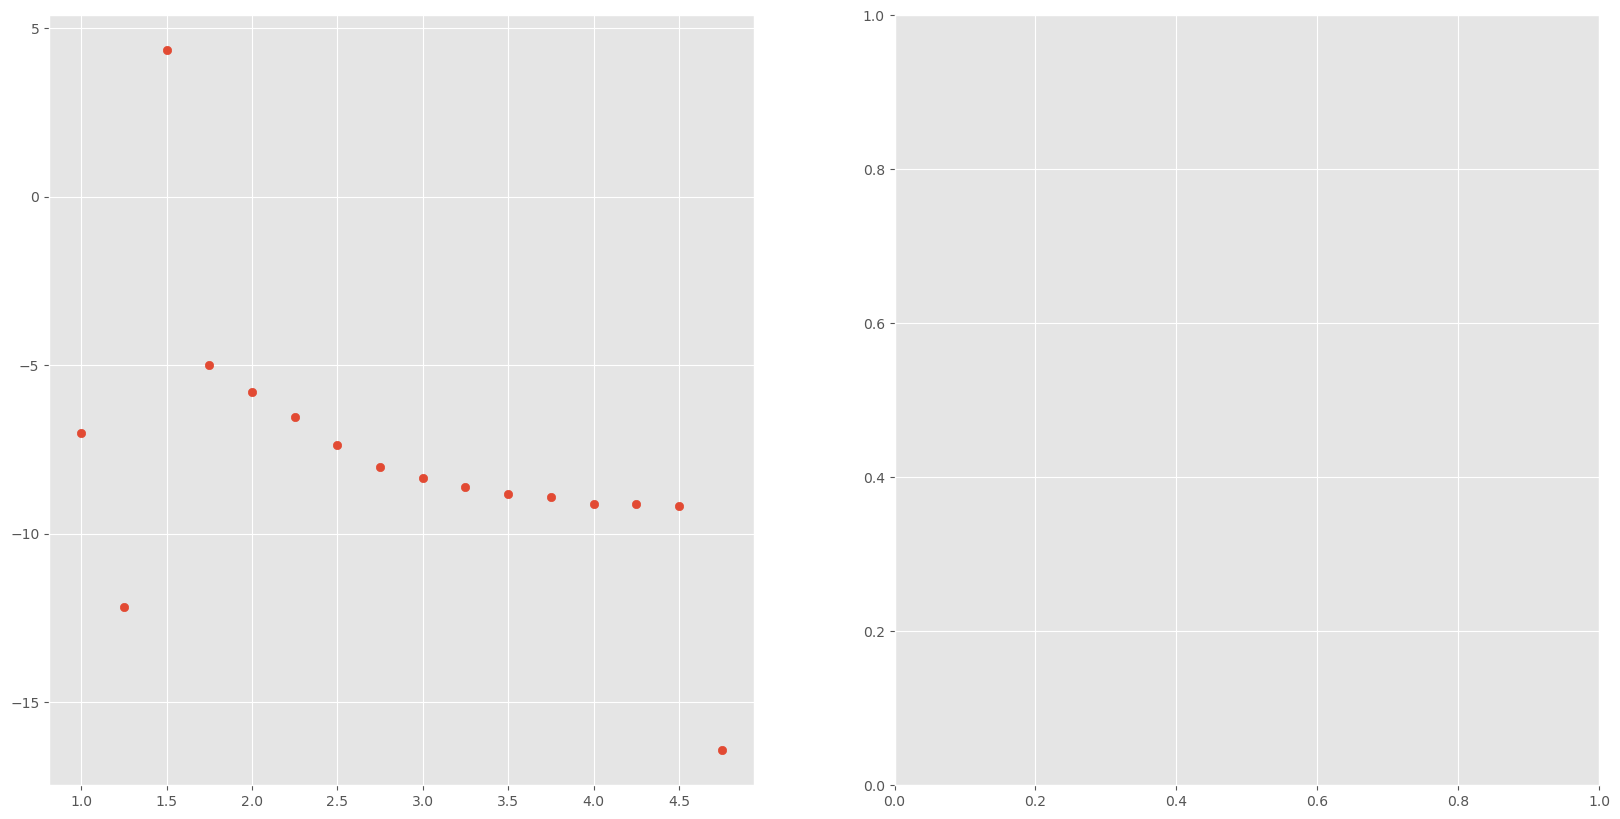

In [ ]:
size = 1000
n = 2

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot polarization vs. pulse duration with fit on the left
size_df = fit_df[fit_df['size'] == size]
size_n_df = size_df[np.isclose(size_df['n'], n, atol=n_tol*1.1)]
if not size_n_df.empty:
    pass